In [ ]:
from google.colab import files
upload_files=files.upload()
# load model & test2 & train2

Saving test2.csv to test2.csv
Saving train2.csv to train2.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import math

In [ ]:
#import pickle
#with open('2018037053_홍진석', 'rb') as f:
#  models = pickle.load(f) # model을 받아옴.

train = pd.read_csv("./train2.csv")
test = pd.read_csv("./test2.csv") # train과 test받아옴.

In [ ]:
train = train[train["Shucked Weight"] >= train["Viscra Weight"]] # 전복무게 < 내장무게 삭제
train = train[train["Shucked Weight"] >= train["Shell Weight"]] # 전복무게 < 껍질무게 삭제
train = train[(train['Whole Weight'] >= (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight']))] # 전체무게 < 전복무게+내장+껍질 삭제
# 전처리 완료!!

In [ ]:
Gender_encode={'F':1,'M':2,'I':3}
col=['Gender']

train[col]=train[col].applymap(Gender_encode.get)
test[col]=test[col].applymap(Gender_encode.get) # applymap이라는 함수를 이용하여 F -> 1, M -> 2, I -> 3 으로 맵핑해줌.

In [ ]:
train.head() 

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,2,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,2,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,1,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
4,1058,1059,2,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9
5,220,221,1,0.565,0.400,0.130,0.6975,0.3075,0.1665,0.1800,8


In [ ]:
test.head()
# test와 train의 Gender를 숫자로 바뀐 것을 알 수 있다.
# 성별도 학습하는 기준이 되었다!!!

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1213,1214,1,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9
1,537,538,2,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19
2,1216,1217,2,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11
3,692,693,3,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6
4,575,576,2,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10


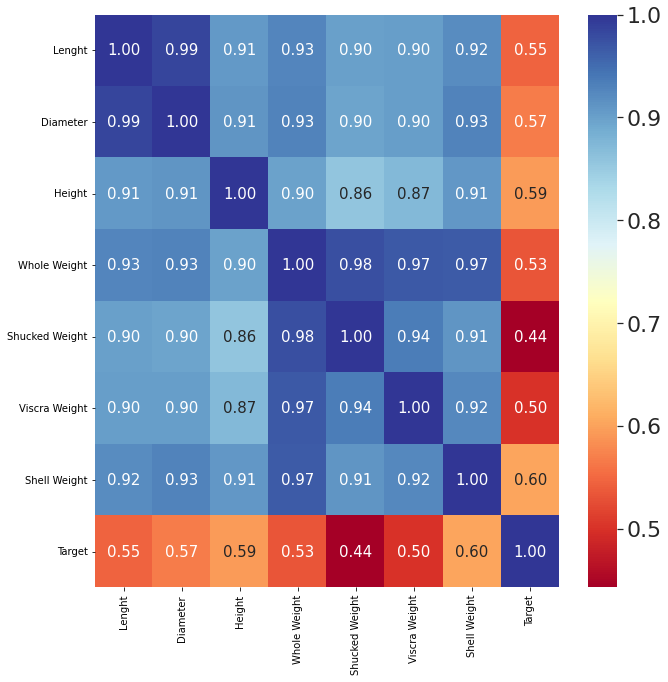

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.gca()

kind_cols = ['Lenght','Diameter','Height','Whole Weight','Shucked Weight', 'Viscra Weight','Shell Weight','Target']
corr=train[kind_cols].corr(method='pearson')
sns.set(font_scale=2)
heatmap = sns.heatmap(corr.values, annot =True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = kind_cols, xticklabels = kind_cols, ax=ax, cmap="RdYlBu")
plt.tight_layout()
plt.show()
# 각 feature들 사이의 상관관계를 히트맵으로 구성해봤다.
# 각 feature들의 상관관계는 새로운 feature들을 만드는 기준으로 쓸 것이다.

In [ ]:
train["Sunsal"]=train['Whole Weight']-train['Viscra Weight']-train['Shucked Weight']
train["SSize"]=2*train['Shell Weight']+train['Diameter']+train["Height"]
train["Size"]=train['Shell Weight']+train['Diameter']+train['Lenght']
train["Ratio"]=train["Shucked Weight"]/train["Whole Weight"]
#train["density"]=train["Shucked Weight"]/(train["Lenght"]*train["Diameter"]*train["Height"])
train["Shell Water"]=train["Whole Weight"]-train["Shucked Weight"]+train["Shell Weight"]
#train['Pie']=train['Diameter']/train['Lenght']
train['Circle']=train['Diameter']*train['Lenght']
#train['foreign body'] = train['Whole Weight'] - (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight'])


test["Sunsal"]=test['Whole Weight']-test['Viscra Weight']-test['Shucked Weight']
test["SSize"]=2*test["Shell Weight"]+test['Diameter']+test["Height"]
test["Size"]=test['Shell Weight']+test['Diameter']+test['Lenght']
test["Ratio"]=test["Shucked Weight"]/test["Whole Weight"]
#test["density"]=test["Shucked Weight"]/(test["Lenght"]*test["Diameter"]*test["Height"])
test["Shell Water"]=test["Whole Weight"]-test["Shucked Weight"]+test["Shell Weight"]
#test['Pie']=test['Diameter']/test['Lenght']
test['Circle']=test['Diameter']*test['Lenght']
#test['foreign body'] = test['Whole Weight'] - (test['Shucked Weight'] + test['Viscra Weight'] + test['Shell Weight'])

# 여기서 Feature를 만든 기준은 Feature 끼리 상관관계가 높은 순으로 했음.
# 그리고 결과를 보고 모델의 성능을 낮춘 Feature들은 주석처리함.

In [ ]:
corr28=train.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

# 각 Feature들과 Target과의 상관관계를 알아봄.

,Target
Target,1.000000
Sunsal,0.622138
SSize,0.604970
Shell Weight,0.602336
Shell Water,0.595841
Height,0.594533
Size,0.584873
Diameter,0.568242
Lenght,0.545174
Circle,0.543394


In [ ]:
train_x = train.drop(['id', 'Target','Unnamed: 0'], axis=1)
train_y = train.Target
# 쓸모없는 id와 Unnamed는 삭제하고, 학습할 data를 나누어준다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
# 앙상블 기법을 쓰기로 했다.

In [ ]:
models=[]

models.append(RandomForestRegressor(random_state=32))
#models.append(LinearRegression())
#models.append(GradientBoostingRegressor(learning_rate=0.06, criterion='mae', random_state=32))
#models.append(LogisticRegression())
# 모델들을 학습시켜본 결과 RandomForest만 학습시키는게 가장 결과가 좋았다.

for model in models:
  model.fit(train_x, train_y) 

In [ ]:
test_x = test.drop(['id','Target','Unnamed: 0'], axis=1)
test_y = test.Target
# 쓸모없는 id와 Unnamed는 삭제하고 학습할 data와 비교할 target을 나누어준다.

In [ ]:
prediction = None

for model in models:
    if prediction is None:
        prediction = model.predict(test_x)
    else:
        prediction += model.predict(test_x)

prediction /= len(models)
# 모든 모델의 결과를 다 더하고, 평균을 구함. -> 측정기준

In [ ]:
prediction # 예측 결과

array([ 9.98, 13.85,  9.67,  7.21,  9.75,  7.69,  8.57, 13.27, 11.39,
        8.12,  6.56, 14.54,  7.68, 11.69, 17.88,  9.89,  8.61,  6.45,
       10.22,  8.53, 10.1 ,  7.69, 12.03, 12.06, 12.5 ,  8.51,  7.19,
        9.34,  9.  ,  8.89, 15.01, 11.64, 10.37,  9.6 ,  6.63,  7.  ,
       10.41,  7.55, 10.09, 10.81,  7.93,  8.39,  6.05, 10.82, 10.58,
        7.65,  9.34, 10.35, 10.79,  7.96,  9.36,  6.97, 11.33, 10.69,
        8.03, 13.51, 10.16,  6.02,  8.56, 16.07,  8.13, 17.09, 13.91,
        8.41,  5.98, 13.26, 11.16, 10.94,  9.49,  8.87, 10.46, 10.15,
        7.7 , 11.28, 10.71, 10.99, 14.09, 10.48,  6.06,  8.88, 10.17,
        7.74, 10.62,  7.29, 10.01,  6.44, 10.91,  8.91, 10.12,  9.07,
       10.7 ,  7.29, 10.8 , 12.94, 13.25, 12.41,  9.58, 11.63,  9.58,
       10.77,  7.15, 10.46,  4.05,  9.06,  9.95,  9.5 ,  6.15,  9.45,
       10.25, 13.9 , 11.02,  7.51,  6.08,  6.34, 10.84,  6.7 , 12.66,
       11.81,  9.44, 11.89, 12.45, 10.44,  9.65, 13.22,  8.  ,  9.79])

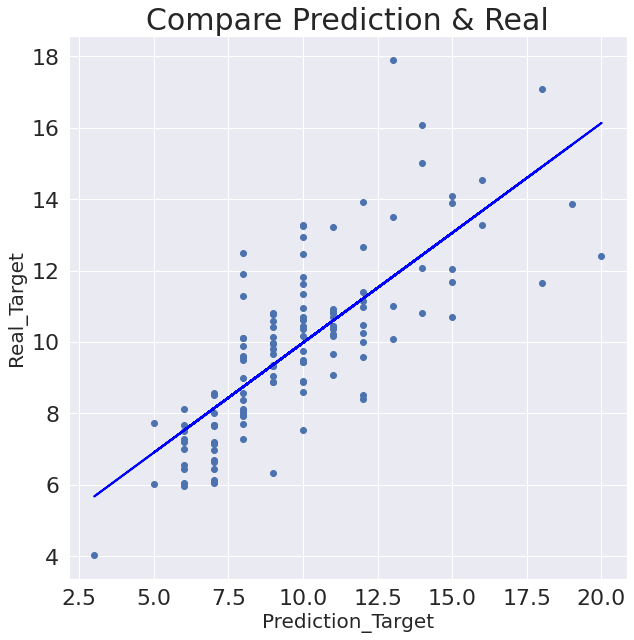

In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
Data=[]
for i,j in zip(prediction, test_y):
  Data.append([i,j])

data=np.array(Data)
x=data[:,1].reshape(-1,1)
y=data[:,0]

regr.fit(x,y)
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x,regr.predict(x), color='blue', linewidth=2)
plt.title('Compare Prediction & Real', size=30)
plt.xlabel('Prediction_Target', size=20)
plt.ylabel('Real_Target', size=20)
plt.show() # 예측 나이와 실제 나이와의 관계를 그래프로 나타냄

In [ ]:
test_y=test.Target
test_y.mean() # 실제 평균나이

9.833333333333334

In [ ]:
prediction.mean() # 예측한 평균나이

9.877460317460317

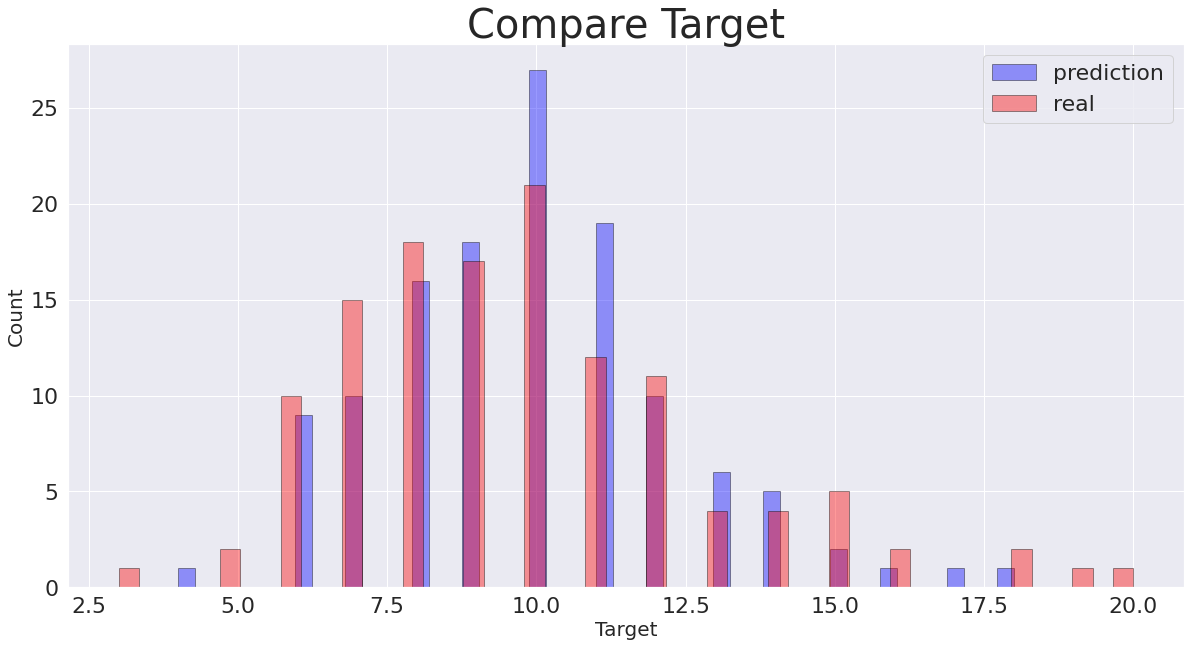

In [ ]:
prediction_round=prediction
prediction_round=np.round(prediction_round, 0) # 실제 나이는 소수점이 없으므로 예측한 나이를 반올림함

plt.figure(figsize=(20,10))
plt.hist(prediction_round, label="prediction", color='blue', alpha=0.4, bins=50, edgecolor='black')
plt.hist(test_y, label="real", color='red', alpha=0.4, bins=50, edgecolor='black')
plt.xlabel('Target', size=20)
plt.ylabel('Count', size=20)
plt.title('Compare Target', size=40)
plt.legend()
plt.show() # 나이 비교 그래프

# 나이가 너무 많은 전복의 경우 잘 예측하지 못한다.

In [ ]:
error=test_y-prediction # 오차

Error=[]
for i in error:
  Error.append(math.sqrt(i*i)) # 평균에서의 '차이'는 음수가 나오면 안되므로 모두 양수로 바꿔준다.

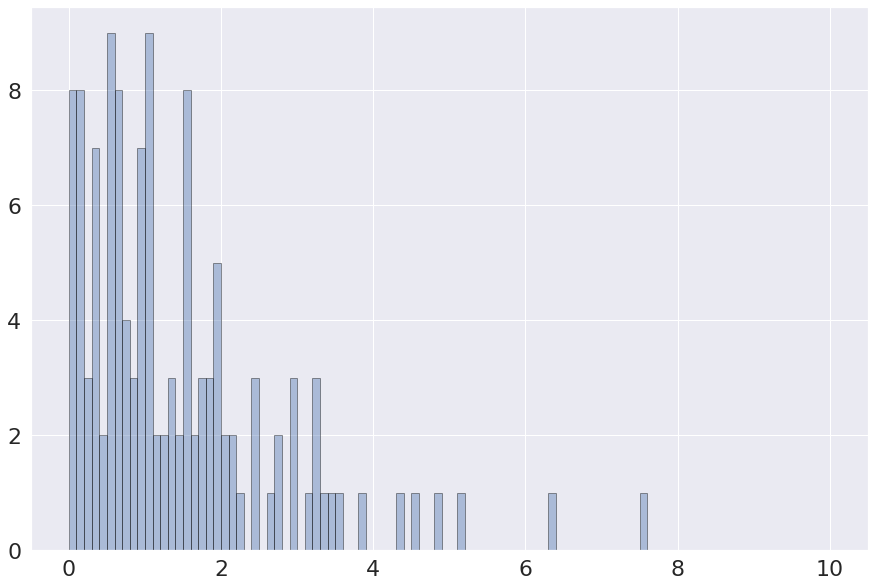

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(Error, alpha=0.4, bins=100, range=[0,10], edgecolor='black')
plt.show() # 오차 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


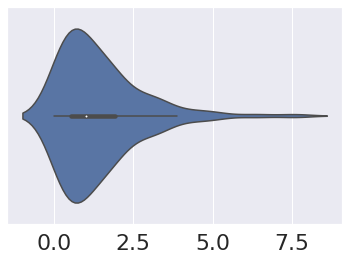

In [ ]:
sns.violinplot(Error) # 오차의 분포

In [ ]:
max(Error) # 최대 오차

7.59

In [ ]:
min(Error) # 최소 오차

0.019999999999999574

In [ ]:
np.mean(Error) # 평균 오차

1.4296825396825397

In [ ]:
np.var(Error)
# 분산 -> 분산이 0에 가까울 수록 성능이 높다고 기준을 두었다.
# 물론 평균 오차가 너무 커지지 않아야 편향이 발생하지 않는다.
# 평균오차와 분산을 적절히 비교하여, 편향과 분산이 낮은 결과를 도출했다. ex) 평균 오차 + 분산

1.7268951373141852

In [ ]:
print(np.var(Error)+np.mean(Error)) # 평균 오차 + 분산

3.156577676996725


In [ ]:
# Lenght를 제거했을 때, 평균 오차 + 분산 = 3.1492905076845554 으로 최저가 되었지만,
# 분산의 값이 더 높아 1.8대로 높아졌으므로 모델의 성능이 더 떨어졌을 것이라고 추측했다.

In [ ]:
# np.mean(Error) 평균오차를 최소로 구했을 때, 나온 결과값 : 1.3601887436373372

In [ ]:
# np.var(Error) 평균오차가 최소일 때의 분산 : 2.032259956157495

In [ ]:
# 평균오차를 최소로 구했을 때, 나온 평균오차 + 분산 = 3.3924486997948327

In [ ]:
np.std(Error) # 표준 편차

1.3141138220543094

In [ ]:
def NMAE(test_y, prediction):
    mae = np.mean(np.abs(test_y-prediction))
    score = mae / np.mean(np.abs(test_y))
    return score

print(NMAE(test_y,prediction))

0.1453914447134786


In [ ]:
import pickle
with open('2018037053_홍진석','wb') as fw:
  pickle.dump(models,fw)